1. Assign some authors to the other epoch.
2. Remove Stendhal
3. Remove all texts with pub_year_estim == 0 && pub_year_estim > 1895

In [1]:
import pandas as pd
from nltk import sent_tokenize
from tqdm.auto import tqdm
import seaborn as sns
tqdm.pandas()

In [2]:
df = pd.read_csv("../data/rom_real_dataset.csv")

In [3]:
df.loc[df.author == 'Gotthelf,-Jeremias', 'epoch'] = "realismus"
df.loc[df.author == 'Droste-Huelshoff,-Annette-von', 'epoch'] = "realismus"

In [4]:
df = df.drop(df.query("author == 'Stendhal'").index)
df = df.drop(df.query("author == 'Balzac,-Honore-de'").index)
df = df.drop(df.query("author == 'Scheerbart,-Paul'").index)
df = df.drop(df.query("author == 'Thoma,-Ludwig'").index)
df = df.drop(df.query("author == 'Meyrink,-Gustav'").index)
df = df.drop(df.query("author == 'Meyrink,-Gustav'").index)
df = df.drop(df.query("author == 'Spiegel,-Karl'").index)
df = df.drop(df.query("author == 'Grimm,-Albert-Ludewig'").index)
df = df.drop(df.query("author == 'Wienbarg,-Ludolf'").index)
df = df.drop(df.query("author == 'Boy-Ed,-Ida'").index)
df = df.drop(df.query("author == 'Franzos,-Karl-Emil'").index)
df = df.drop(df.query("author == 'Stifter,-Adalbert'").index)
df = df.drop(df.query("author == 'Manzoni,-Alessandro'").index)


df = df.drop(df.query('title == "1. Mordi\'s Garten"').index)
df = df.drop(df.query('title == "1. Schneewittchen"').index)

In [5]:
df = pd.concat([
    df.query("author == @author").sample(5, random_state=1) if len(df.query("author == @author")) > 5 else df.query("author == @author")
    for author in df.author.unique()
    
])
df = df.reset_index(drop=True)

In [6]:
df["n_sents"] = df.normed_text.progress_apply(
    lambda text: len(sent_tokenize(text, language="german"))
)
df = df.query("n_sents > 500 and n_sents < 15_000") #10

  0%|          | 0/123 [00:00<?, ?it/s]

<AxesSubplot:xlabel='epoch', ylabel='n_sents'>

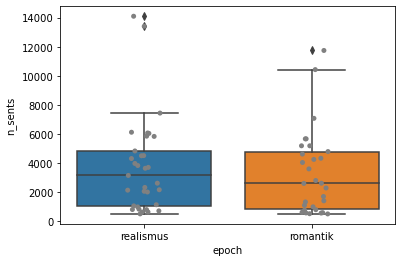

In [7]:
sns.boxplot(x="epoch", y="n_sents", data=df)
sns.stripplot(x="epoch", y="n_sents", color="gray", data=df)

In [8]:
df = df.query("pub_year_estim > 0")

In [9]:
df.reset_index().to_csv("../data/rom_real_dataset_final.csv", index=False)

In [10]:
df.epoch.value_counts()

realismus    33
romantik     30
Name: epoch, dtype: int64

In [11]:
df.query("title == 'Effi Briest'")

,author,author_pnd,author_gender,author_city_of_birth,author_country_of_birth,author_date_of_birth,creation_year,pub_year,pub_place,epoch,title,text,normed_text,tagged_text,lemmatized_text,pub_year_estim,decade,n_sents
45,"Fontane,-Theodor",118534262,Männlich,Neuruppin,Brandenburg,1819-12-30 00:00:00,1819-1898,NaN,Berlin und Weimar,realismus,Effi Briest,1. Kapitel\n \n \n \n \n \n \n \nErstes Kapite...,1. Kapitel Erstes Kapitel In Front des schon s...,1 <CARD> . <$.> Kapitel <NN> Erstes <ADJA> Kap...,1. kapitel erstes kapitel in front der schon s...,1894.0,189.0,6047


In [12]:
df.query("epoch == 'realismus'").sort_values(by="pub_year_estim", ascending=False).head(15)

,author,author_pnd,author_gender,author_city_of_birth,author_country_of_birth,author_date_of_birth,creation_year,pub_year,pub_place,epoch,title,text,normed_text,tagged_text,lemmatized_text,pub_year_estim,decade,n_sents
44,"Fontane,-Theodor",118534262,Männlich,Neuruppin,Brandenburg,1819-12-30 00:00:00,1891,NaN,Berlin und Weimar,realismus,Die Poggenpuhls,1. Kapitel\n \n \n \n \n \n \n \nErstes Kapite...,1. Kapitel Erstes Kapitel Die Poggenpuhls - ei...,1 <CARD> . <$.> Kapitel <NN> Erstes <ADJA> Kap...,1. kapitel erstes kapitel der poggenpuhls - ei...,1895.0,189.0,2070
45,"Fontane,-Theodor",118534262,Männlich,Neuruppin,Brandenburg,1819-12-30 00:00:00,1819-1898,NaN,Berlin und Weimar,realismus,Effi Briest,1. Kapitel\n \n \n \n \n \n \n \nErstes Kapite...,1. Kapitel Erstes Kapitel In Front des schon s...,1 <CARD> . <$.> Kapitel <NN> Erstes <ADJA> Kap...,1. kapitel erstes kapitel in front der schon s...,1894.0,189.0,6047
99,"Meyer,-Conrad-Ferdinand",118581775,Männlich,Zürich,Kanton Zürich,1825-10-11 00:00:00,1825-1898,1968.0,München,realismus,Angela Borgia,1. Kapitel\n \n \n \n \n \n \n \nErstes Kapite...,1. Kapitel Erstes Kapitel Als die Angetraute d...,1 <CARD> . <$.> Kapitel <NN> Erstes <ADJA> Kap...,1. kapitel erstes kapitel als der angetraute d...,1891.0,189.0,2174
106,"Raabe,-Wilhelm",118597442,Männlich,Eschershausen,Niedersachsen,1831-09-08 00:00:00,1888-1890,1964.0,Berlin und Weimar,realismus,Stopfkuchen. Eine See- und Mordgeschichte,Wilhelm Raabe\n\n\n Stopfkuchen\n Eine See- un...,Wilhelm Raabe Stopfkuchen Eine See- und Mordge...,Wilhelm <NE/B-PER> Raabe <NE/E-PER> Stopfkuche...,wilhelm raabe stopfkuchen eine see- und mordge...,1891.0,189.0,3159
115,"Storm,-Theodor",118618725,Männlich,Husum (Kreis Nordfriesland),Schleswig-Holstein,1817-09-14 00:00:00,1817-1888,NaN,Berlin und Weimar,realismus,Der Schimmelreiter,Theodor Storm\n\n\n Der Schimmelreiter\n\n \n ...,Theodor Storm Der Schimmelreiter Was ich zu be...,Theodor <NE/B-PER> Storm <NE/E-PER> Der <ART/B...,theodor storm der schimmelreiter was ich zu be...,1888.0,188.0,2021
107,"Raabe,-Wilhelm",118597442,Männlich,Eschershausen,Niedersachsen,1831-09-08 00:00:00,1884-1885,1964.0,Berlin und Weimar,realismus,Im alten Eisen,Erstes Kapitel\n \n \n \n \n \n \n \nErstes Ka...,Erstes Kapitel Erstes Kapitel Solange der Mens...,Erstes <ADJA> Kapitel <NN> Erstes <ADJA> Kapit...,erstes kapitel erstes kapitel solange der mens...,1887.0,188.0,2627
34,"Ebner-Eschenbach,-Marie-von",118528661,Weiblich,Schloss Zdislawitz,Tschechische Republik,1830-09-13 00:00:00,1830-1916,1956.0,München,realismus,Das Gemeindekind,[Motto]\n \n \n \n \n \n \n \n\n \n \n \n»Tout...,"[ Motto ]\n"" Tout est l'historie . ""\nGeorge S...","[ <$(> Motto <NN> ] <$(> "" <$(> Tout <FM> est ...","[ motto ] "" tout est l'historie . "" george san...",1887.0,188.0,3840
81,"Keller,-Gottfried",11856109X,Männlich,Zürich,Kanton Zürich,1819-07-19 00:00:00,1819-1890,1958.0,Berlin,realismus,Martin Salander,1.\n \n \n \n \n \n \n \nI\n\n Ein noch nicht ...,"1. I Ein noch nicht bejahrter Mann , wohlgekle...",1 <CARD> . <$.> I <CARD> Ein <ART> noch <ADV> ...,"1. i ein noch nicht bejahrter mann , wohlgekle...",1886.0,188.0,4840
47,"Fontane,-Theodor",118534262,Männlich,Neuruppin,Brandenburg,1819-12-30 00:00:00,1884-1885,NaN,Berlin und Weimar,realismus,Unterm Birnbaum,1. Kapitel\n \n \n \n \n \n \n \nErstes Kapite...,1. Kapitel Erstes Kapitel Vor dem in dem große...,1 <CARD> . <$.> Kapitel <NN> Erstes <ADJA> Kap...,1. kapitel erstes kapitel vor der in der groß ...,1885.0,188.0,2335
43,"Fontane,-Theodor",118534262,Männlich,Neuruppin,Brandenburg,1819-12-30 00:00:00,1881-1883,NaN,Berlin und Weimar,realismus,Graf Petöfy,1. Kapitel\n \n \n \n \n \n \n \nErstes Kapite...,1. Kapitel Erstes Kapitel In einer der Querstr...,1 <CARD> . <$.> Kapitel <NN> Erstes <ADJA> Kap...,1. kapitel erstes kapitel in einer der querstr...,1884.0,188.0,3651


In [13]:
df.query("epoch == 'realismus'").sort_values(by="pub_year_estim", ascending=False).tail(15)

,author,author_pnd,author_gender,author_city_of_birth,author_country_of_birth,author_date_of_birth,creation_year,pub_year,pub_place,epoch,title,text,normed_text,tagged_text,lemmatized_text,pub_year_estim,decade,n_sents
96,"Meyer,-Conrad-Ferdinand",118581775,Männlich,Zürich,Kanton Zürich,1825-10-11 00:00:00,1825-1898,1968.0,München,realismus,Der Schuß von der Kanzel,Erstes Kapitel\n \n \n \n \n \n Erstes Kapitel...,Erstes Kapitel Erstes Kapitel Zweien geistlich...,Erstes <ADJA> Kapitel <NN> Erstes <ADJA> Kapit...,erstes kapitel erstes kapitel zweien geistlich...,1861.0,186.0,997
95,"Ludwig,-Otto",118574973,Männlich,Eisfeld,Thüringen,1813-02-12 00:00:00,1854-1855,1956.0,Leipzig,realismus,Die Heiteretei und ihr Widerspiel,Otto Ludwig\n\n\n Die Heiteretei\n\n \n\n \n \...,"Otto Ludwig Die Heiteretei "" Auch zum Gründer ...",Otto <NE/B-PER> Ludwig <NE/E-PER> Die <ART> He...,"otto ludwig der heiteretei "" auch zum gründer ...",1857.0,185.0,5840
94,"Ludwig,-Otto",118574973,Männlich,Eisfeld,Thüringen,1813-02-12 00:00:00,1854-1855,1956.0,Leipzig,realismus,Zwischen Himmel und Erde,Otto Ludwig\n\n\n Zwischen Himmel und Erde\n\n...,Otto Ludwig Zwischen Himmel und Erde Das Gärtc...,Otto <NE/B-PER> Ludwig <NE/E-PER> Zwischen <AP...,otto ludwig zwischen himmel und erde der gärtc...,1856.0,185.0,4319
83,"Keller,-Gottfried",11856109X,Männlich,Zürich,Kanton Zürich,1819-07-19 00:00:00,1819-1890,1958.0,Berlin,realismus,Kleider machen Leute,Kleider machen Leute\n\n An einem unfreundlich...,Kleider machen Leute An einem unfreundlichen N...,Kleider <NN> machen <VVFIN> Leute <NN> An <APP...,kleid machen leute an einer unfreundlich novem...,1854.0,185.0,518
116,"Storm,-Theodor",118618725,Männlich,Husum (Kreis Nordfriesland),Schleswig-Holstein,1817-09-14 00:00:00,1817-1888,NaN,Berlin und Weimar,realismus,Immensee,Der Alte\n \n \n \n \n \n \n \nDer Alte\n\n An...,Der Alte Der Alte An einem Spätherbstnachmitta...,Der <ART> Alte <ADJA> Der <ART> Alte <NN> An <...,der alte der alte an einer spätherbstnachmitta...,1852.0,185.0,651
114,"Storm,-Theodor",118618725,Männlich,Husum (Kreis Nordfriesland),Schleswig-Holstein,1817-09-14 00:00:00,1817-1888,NaN,Berlin und Weimar,realismus,Die Söhne des Senators,Theodor Storm\n\n\n Die Söhne des Senators\n\n...,Theodor Storm Die Söhne des Senators Der nun l...,Theodor <NE/B-PER> Storm <NE/E-PER> Die <ART> ...,theodor storm der sohn der senator der nun län...,1852.0,185.0,645
73,"Hebbel,-Friedrich",118547445,Männlich,Wesselburen,Schleswig-Holstein,1813-03-18 00:00:00,1836-1837,1963.0,München,realismus,Schnock,Vorwort\n \n \n \n \n \n \n \nVorwort\n\n Der ...,Vorwort Vorwort Der Komponist pflegt seinem Mu...,Vorwort <NN> Vorwort <NN> Der <ART> Komponist ...,vorwort vorwort der komponist pflegen mein mus...,1850.0,185.0,817
54,"Gotthelf,-Jeremias",118540963,Männlich,Murten,Kanton Freiburg (Üechtland),1797-10-04 00:00:00,1797-1854,1978.0,Zürich,realismus,Uli der Pächter,Vorwort\n \n \n \n \n \n \n \nVorwort\n\n Der ...,Vorwort Vorwort Der erste Teil dieses Buches e...,Vorwort <NN> Vorwort <NN> Der <ART> erste <ADJ...,vorwort vorwort der erste teil dies buch entha...,1849.0,184.0,6075
0,"Alexis,-Willibald",118648071,Männlich,Breslau,Polen,1798-06-29 00:00:00,1798-1871,NaN,Berlin,realismus,Die Hosen des Herrn von Bredow,1. Kapitel. Die Herbstwäsche\n \n \n \n \n \n ...,1. Kapitel .\nDie Herbstwäsche Erstes Kapitel ...,1 <CARD> . <$.> Kapitel <NN> . <$.> Die <ART> ...,1. kapitel . der herbstwäsche erstes kapitel ....,1846.0,184.0,7443
53,"Gotthelf,-Jeremias",118540963,Männlich,Murten,Kanton Freiburg (Üechtland),1797-10-04 00:00:00,1797-1854,1978.0,Zürich,realismus,Geld und Geist,Jeremias Gotthelf\n\n\n Geld und Geist\n\n \n ...,Jeremias Gotthelf Geld und Geist oder Die Vers...,Jeremias <NE/S-PER> Gotthelf <NE> Geld <NN> un...,jeremias gotthelf geld und geist oder der vers...,1843.0,184.0,4511


In [14]:
df.query("epoch == 'romantik'").sort_values(by="pub_year_estim", ascending=False).head(15)

,author,author_pnd,author_gender,author_city_of_birth,author_country_of_birth,author_date_of_birth,creation_year,pub_year,pub_place,epoch,title,text,normed_text,tagged_text,lemmatized_text,pub_year_estim,decade,n_sents
2,"Arnim,-Bettina-von",118504185,Weiblich,Frankfurt am Main,Hessen,1785-04-04 00:00:00,1844-1848,1965.0,Frechen,romantik,Das Leben der Hochgräfin Gritta von Rattenzuha...,Bettina von Arnim\n\n Das Leben der Hochgräfin...,Bettina von Arnim Das Leben der Hochgräfin Gri...,Bettina <NE/B-PER> von <APPR/I-PER> Arnim <NE/...,bettina von arnim der leben der hochgräfin gri...,1846.0,184.0,2811
3,"Arnim,-Bettina-von",118504185,Weiblich,Frankfurt am Main,Hessen,1785-04-04 00:00:00,1785-1859,1959.0,Frechen,romantik,Clemens Brentanos Frühlingskranz,Bettina von Arnim\n\n\n Clemens Brentanos\n Fr...,Bettina von Arnim Clemens Brentanos Frühlingsk...,Bettina <NE/B-PER> von <APPR/I-PER> Arnim <NE/...,bettina von arnim clemens brentano frühlingskr...,1844.0,184.0,3608
4,"Arnim,-Bettina-von",118504185,Weiblich,Frankfurt am Main,Hessen,1785-04-04 00:00:00,1785-1859,1959.0,Frechen,romantik,Die Günderode,Den Studenten\n \n \n \n \n \n \n \nDen Studen...,Den Studenten Den Studenten Die Ihr gleich gol...,Den <ART> Studenten <NN> Den <ART> Studenten <...,der student der student der mein gleichen gold...,1840.0,184.0,4798
120,"Tieck,-Ludwig",12989432X,Männlich,Berlin,Berlin,1773-05-31 00:00:00,1773-1853,1963.0,München,romantik,Vittoria Accorombona,Erster Teil\n \n \n \n \n \n \n \n Vorwort\n \...,Erster Teil Vorwort Vorwort Schon vor vielen J...,Erster <ADJA> Teil <NN> Vorwort <NN> Vorwort <...,erster teil vorwort vorwort schon vor viel jah...,1840.0,184.0,4627
80,"Immermann,-Karl",118555553,Männlich,Magdeburg,Sachsen-Anhalt,1796-04-24 00:00:00,1796-1840,1971.0,Wiesbaden,romantik,Münchhausen,Erster Teil\n \n \n \n \n \n \n \n Erstes Buch...,Erster Teil Erstes Buch .\nMünchhausens Debüt ...,Erster <ADJA> Teil <NN> Erstes <ADJA> Buch <NN...,erster teil erstes buch . münchhausens debüt e...,1838.0,183.0,11744
119,"Tieck,-Ludwig",12989432X,Männlich,Berlin,Berlin,1773-05-31 00:00:00,1773-1853,1963.0,München,romantik,Der junge Tischlermeister,Erster Teil\n \n \n \n \n \n \n \n Vorwort\n \...,Erster Teil Vorwort Vorwort Es ist ein bekannt...,Erster <ADJA> Teil <NN> Vorwort <NN> Vorwort <...,erster teil vorwort vorwort ich sein einen bek...,1836.0,183.0,5195
79,"Immermann,-Karl",118555553,Männlich,Magdeburg,Sachsen-Anhalt,1796-04-24 00:00:00,1796-1840,1971.0,Wiesbaden,romantik,Die Epigonen,Erstes Buch. Klugheit und Irrtum\n \n \n \n \n...,Erstes Buch .\nKlugheit und Irrtum Erstes Kapi...,Erstes <ADJA> Buch <NN> . <$.> Klugheit <NN> u...,erstes buch . klugheit und irrtum erstes kapit...,1836.0,183.0,10430
6,"Arnim,-Bettina-von",118504185,Weiblich,Frankfurt am Main,Hessen,1785-04-04 00:00:00,1785-1859,1959.0,Frechen,romantik,Goethes Briefwechsel mit einem Kinde,Erster Teil\n \n \n \n \n \n \n \n Vorrede\n \...,Erster Teil Vorrede Vorrede Dies Buch ist für ...,Erster <ADJA> Teil <NN> Vorrede <NN> Vorrede <...,erster teil vorreden vorreden dies buch sein f...,1835.0,183.0,5672
121,"Waiblinger,-Wilhelm",11862850X,Männlich,Heilbronn,Baden-Württemberg,1804-11-21 00:00:00,1804-1830,1981.0,Stuttgart,romantik,Die Briten in Rom,Wilhelm Waiblinger\n\n\n Die Briten in Rom\n\n...,Wilhelm Waiblinger Die Briten in Rom Novelle W...,Wilhelm <NE/B-PER> Waiblinger <NE/E-PER> Die <...,wilhelm waiblinger der brite in rom novelle ic...,1828.0,182.0,2298
122,"Waiblinger,-Wilhelm",11862850X,Männlich,Heilbronn,Baden-Württemberg,1804-11-21 00:00:00,1828,1981.0,Stuttgart,romantik,Das Märchen von der blauen Grotte,Wilhelm Waiblinger\n\n\n Das Märchen von der b...,Wilhelm Waiblinger Das Märchen von der blauen ...,Wilhelm <NE/B-PER> Waiblinger <NE/E-PER> Das <...,wilhelm waiblinger der märchen von der blau gr...,1828.0,182.0,779


In [15]:
df.query("epoch == 'romantik'").sort_values(by="pub_year_estim", ascending=False).tail(15)

,author,author_pnd,author_gender,author_city_of_birth,author_country_of_birth,author_date_of_birth,creation_year,pub_year,pub_place,epoch,title,text,normed_text,tagged_text,lemmatized_text,pub_year_estim,decade,n_sents
78,"Hoffmann,-E.-T.-A.",118552465,Männlich,Königsberg,Russland,1776-01-24 00:00:00,1819-1821,1963.0,Berlin,romantik,Lebensansichten des Katers Murr,Erster Band\n \n \n \n \n \n \n \n Vorwort des...,Erster Band Vorwort des Herausgebers Vorwort d...,Erster <ADJA> Band <NN> Vorwort <NN> des <ART>...,erster band vorwort der herausgeber vorwort de...,1819.0,181.0,5674
39,"Eichendorff,-Joseph-von",118529390,Männlich,Łubowice,Polen,1788-03-10 00:00:00,1816-1817,1970.0,München,romantik,Das Marmorbild,Joseph von Eichendorff\n\n Das Marmorbild\n\n ...,Joseph von Eichendorff Das Marmorbild Es war e...,Joseph <NE/B-PER> von <APPR/I-PER> Eichendorff...,joseph von eichendorff der marmorbild ich sein...,1816.0,181.0,627
77,"Hoffmann,-E.-T.-A.",118552465,Männlich,Königsberg,Russland,1776-01-24 00:00:00,1814-1815,1963.0,Berlin,romantik,Die Elixiere des Teufels,Vorwort des Herausgebers\n \n \n \n \n \n \n V...,Vorwort des Herausgebers Vorwort des Herausgeb...,Vorwort <NN> des <ART> Herausgebers <NN> Vorwo...,vorwort der herausgeber vorwort der herausgebe...,1815.0,181.0,4259
51,"Goerres,-Joseph",11854019X,Männlich,Koblenz,Rheinland-Pfalz,1776-01-25 00:00:00,1776-1848,NaN,Köln,romantik,Die Teutschen Volksbücher,An Clemens Brentano\n \n \n \n \n \n \n \nAn C...,An Clemens Brentano An Clemens Brentano .\nIch...,An <APPR> Clemens <NE/B-PER> Brentano <NE/E-PE...,an clemens brentano an clemens brentano . ich ...,1812.0,181.0,1712
10,"Arnim,-Ludwig-Achim-von",118504177,Männlich,Berlin,Berlin,1781-01-26 00:00:00,1781-1831,1962.0,München,romantik,Isabella von Ägypten,Ludwig Achim von Arnim\n\n\n Isabella von Ägyp...,"Ludwig Achim von Arnim Isabella von Ägypten , ...",Ludwig <NE/B-PER> Achim <NE/I-PER> von <APPR/I...,"ludwig achim von arnim isabella von ägypten , ...",1812.0,181.0,1107
22,"Brentano,-Clemens",118515055,Männlich,Ehrenbreitstein,"Deutschland, Deutsches Reich",1778-09-09 00:00:00,1778-1842,1963.0,München,romantik,Geschichte vom braven Kasperl und dem schönen ...,Clemens Brentano\n\n\n Geschichte vom braven K...,Clemens Brentano Geschichte vom braven Kasperl...,Clemens <NE/B-PER> Brentano <NE/E-PER> Geschic...,clemens brentano geschichte vom brav kasperl u...,1810.0,181.0,529
86,"Kerner,-Justinus",118561545,Männlich,Ludwigsburg,Baden-Württemberg,1786-09-18 00:00:00,1808-1810,1914.0,Berlin,romantik,Reiseschatten. Von dem Schattenspieler Luchs,[Widmung]\n \n \n \n \n \n An Ludewig Olof\n\n...,"[ Widmung ]\nAn Ludewig Olof "" Es ist auch mög...",[ <$(> Widmung <NN> ] <$(> An <APPR> Ludewig <...,"[ widmung ] an ludewig olof "" ich sein auch mö...",1809.0,180.0,2625
28,"Chamisso,-Adelbert-von",118520040,Männlich,Schloss Boncourt (Ante),Frankreich,1781-01-30 00:00:00,1781-1838,1975.0,München,romantik,Peter Schlemihls wundersame Geschichte,An meinen alten Freund Peter Schlemihl\n \n \n...,An meinen alten Freund Peter Schlemihl An mein...,An <APPR> meinen <PPOSAT> alten <ADJA> Freund ...,an mein alt freund peter schlemihl an mein alt...,1809.0,180.0,1002
11,"Arnim,-Ludwig-Achim-von",118504177,Männlich,Berlin,Berlin,1781-01-26 00:00:00,1781-1831,1962.0,München,romantik,Die drei liebreichen Schwestern und der glückl...,Ludwig Achim von Arnim\n\n\n Die drei liebreic...,Ludwig Achim von Arnim Die drei liebreichen Sc...,Ludwig <NE/B-PER> Achim <NE/I-PER> von <APPR/I...,ludwig achim von arnim der drei liebreichen sc...,1806.0,180.0,574
88,"Klingemann,-August",118563300,Männlich,Braunschweig,Niedersachsen,1777-08-31 00:00:00,1777-1831,1974.0,Frankfurt a.M.,romantik,Die Nachtwachen des Bonaventura,Erste Nachtwache\n \n \n \n \n \n \n \nErste N...,Erste Nachtwache Erste Nachtwache Die Nachtstu...,Erste <ADJA> Nachtwache <NN> Erste <ADJA> Nach...,erster nachtwache erster nachtwache der nachts...,1804.0,180.0,1338


In [22]:
print(*sorted(df.query("epoch == 'romantik'").title.unique()), sep="\n")

Clemens Brentanos Frühlingskranz
Das Leben der Hochgräfin Gritta von Rattenzuhausbeiuns
Das Marmorbild
Das Märchen von der blauen Grotte
Das Schloß Dürande
Der junge Tischlermeister
Die Briten in Rom
Die Elixiere des Teufels
Die Epigonen
Die Glücksritter
Die Günderode
Die Nachtwachen des Bonaventura
Die Teutschen Volksbücher
Die drei liebreichen Schwestern und der glückliche Färber
Doktor Faustus
Franz Sternbalds Wanderungen
Geschichte der poetischen Literatur Deutschlands
Geschichte des Herrn William Lovell
Geschichte vom braven Kasperl und dem schönen Annerl
Godwi oder Das steinerne Bild der Mutter
Goethes Briefwechsel mit einem Kinde
Heinrich von Ofterdingen
Isabella von Ägypten
Lebensansichten des Katers Murr
Lucinde
Münchhausen
Peter Schlemihls wundersame Geschichte
Phantasien im Bremer Ratskeller
Reiseschatten. Von dem Schattenspieler Luchs
Vittoria Accorombona


In [23]:
print(*sorted(df.query("epoch == 'realismus'").title.unique()), sep="\n")

Abu Telfan oder Die Heimkehr vom Mondgebirge
Angela Borgia
Barthli der Korber
Bozena
Das Gemeindekind
Der Heilige
Der Hungerpastor
Der Schimmelreiter
Der Schuß von der Kanzel
Die Heiteretei und ihr Widerspiel
Die Hosen des Herrn von Bredow
Die Judenbuche
Die Poggenpuhls
Die Söhne des Senators
Die einsamen Kinder
Die verlorene Handschrift
Effi Briest
Geld und Geist
Graf Petöfy
Gustav Adolfs Page
Im alten Eisen
Immensee
Jürg Jenatsch
Kleider machen Leute
Ledwina
Martin Salander
Schnock
Stopfkuchen. Eine See- und Mordgeschichte
Uli der Pächter
Unterm Birnbaum
Vor dem Sturm
Wie Uli der Knecht glücklich wird
Zwischen Himmel und Erde
